KeyboardInterrupt: 

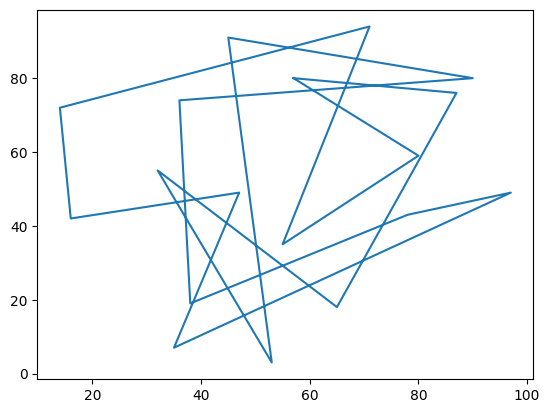

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

xpos = np.array([57, 16, 14, 47, 90, 55, 35, 80, 45, 38, 78, 36, 53, 71, 87, 32, 65, 97, 7])
ypos = np.array([80, 42, 72, 49, 80, 35, 7, 59, 91, 19, 43, 74, 3, 94, 76, 55, 18, 49, 51, 99])

# These arrays will be the order of travel
# The end of the paths will be the same as the starting point
xpath = np.append(xpos, xpos[0])
ypath = np.append(ypos, ypos[0])

# Define iterator, second parameter is the step size
# The first and the last coordinates in the paths will never be chosen
iterator = np.arange(1,xpos.size-1,1)

def get_distance(x1,y1,x2,y2):
    """x1/y1 correspond to first coordinate
    and x2/y2 correspond to second coordinate"""
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def total_energy(x,y,iter):
    """x is the array path of x coordinates
    y is the array path of y coordinates"""
    total_energy = get_distance(x[0],y[0],x[iter[0]],y[iter[0]])
    for i in range(1, iter.size):
        energy = get_distance(x[iter[i]],y[iter[i]],x[iter[i-1]],y[iter[i-1]])
        total_energy += energy     
    # Get energy from last point to starting point
    energy = get_distance(x[iter.size],y[iter.size],x[0],y[0])
    total_energy += energy
    return total_energy


def swap(iter):
    rand_int = random.randrange(0, iterator.size - 2)
    iter[rand_int], iter[rand_int-1] = iter[rand_int-1], iter[rand_int]
    return iter

energy_list = np.array([])
energy_list = np.append(energy_list, total_energy(xpath,ypath,iterator))

# to run GUI event loop
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(np.append(np.append(xpos[0],xpos[iterator]),xpos[0]), np.append(np.append(ypos[0],ypos[iterator]),ypos[0]))

for i in range(1000):
    iterator = swap(iterator)
    energy = total_energy(xpos,ypos,iterator)
    # subplot = fig.add_subplot(1,1,1)
    # subplot.plot(np.append(np.append(xpos[0],xpos[iterator]),xpos[0]), np.append(np.append(ypos[0],ypos[iterator]),ypos[0]))

    # updating the value of x and y
    line1.set_xdata(np.append(np.append(xpos[0],xpos[iterator]),xpos[0]))
    line1.set_ydata(np.append(np.append(ypos[0],ypos[iterator]),ypos[0]))
 
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.1)

    # delta E = E_i - E_i-1 where E_i is current energy and E_i-1  is previous energy
    # if delta E < 0, accept the current path
    if energy < energy_list[-1]:
        energy_list = np.append(energy_list, energy)
    # else, do nothing and keep the old path


plt.plot(energy_list)
plt.show()



